# Investigate Business Hotel using Data Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#import file csv
df = pd.read_csv('hotel_bookings_data.csv')
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
56373,City Hotel,1,76,2018,November,37,4,2,0,3,...,0,No Deposit,8.0,NaN,0,Personal,207.9,0,1,Canceled
118273,City Hotel,0,41,2019,October,33,14,1,3,2,...,0,No Deposit,83.0,NaN,0,Personal,131.2,0,0,Check-Out
37057,Resort Hotel,0,273,2019,August,22,2,1,2,3,...,0,No Deposit,242.0,NaN,0,Personal,143.1,0,2,Check-Out
82995,City Hotel,0,4,2018,March,2,9,1,1,2,...,0,No Deposit,NaN,45.0,0,Personal,0.0,1,1,Check-Out
4718,Resort Hotel,1,2,2018,May,14,30,0,2,1,...,1,No Deposit,NaN,31.0,0,Personal,42.0,0,0,No-Show


In [3]:
#check information from csv file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
#check missing values in data
sum_missing = df.isna().sum()
percent_missing = round(df.isna().sum() * 100 / len(df),2)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'sum_missing': sum_missing,
                                 'percent_missing': percent_missing}).reset_index(drop=True)
missing_value_df

,column_name,sum_missing,percent_missing
0,hotel,0,0.00
1,is_canceled,0,0.00
2,lead_time,0,0.00
3,arrival_date_year,0,0.00
4,arrival_date_month,0,0.00
5,arrival_date_week_number,0,0.00
6,arrival_date_day_of_month,0,0.00
7,stays_in_weekend_nights,0,0.00
8,stays_in_weekdays_nights,0,0.00
9,adults,0,0.00


Missing value in columns : Children, city, agent, company

### Handling missing values

In [5]:
df['children'].fillna(df['children'].median(), inplace = True)  # just 4 data are missing
df['city'].fillna(df['city'].mode()[0], inplace = True)   # using mode because column city has a datatype 'object'
df['agent'].fillna(df['agent'].median(), inplace = True)  # using median because the data is positively skewed 

df.drop('company', axis=1, inplace=True)  #drop the column because it has too much missing values

In [6]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

### Changing unsuitable values

In [7]:
df['meal'].value_counts()  #the only column with undefined values

Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

In [8]:
df['meal'].replace('Undefined', 'Breakfast', inplace = True)  # meal has data type 'object', replacing undefined data with most frequent data
df['meal'].value_counts()

Breakfast     93479
Dinner        14463
No Meal       10650
Full Board      798
Name: meal, dtype: int64

### Delete Unnecessary Data

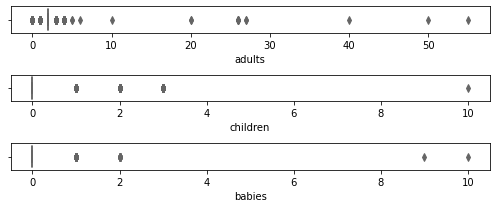

In [9]:
# analyzing/selecting the unnecessary data
guests = ['adults', 'children', 'babies']
plt.figure(figsize=(7,3))

for i, column in enumerate (df[guests].columns, 1): 
    plt.subplot(3, 1, i)
    sns.boxplot(data=df[guests], x=df[column], color='cornflowerblue')
    plt.tight_layout()

In [10]:
df['adults'].value_counts()

2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

In [11]:
df['children'].value_counts()

0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [12]:
df['babies'].value_counts()

0     118473
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

from analysis above, we can see that number of guests for each booking has some outliers and kind of unrealistic data such as 9-10 babies and no adult in a booking, etc. so it's better to remove those data.

In [14]:
df.shape # initial amount of th data

(119390, 28)

In [15]:
# deleting unnecesary data
df = df[~ ((df['adults'] >4) | (df['adults'] == 0))]
df = df[~ ((df['children'] >3))]
df = df[(df['babies'] <= 2)]


In [17]:
df.shape # amount of the data after deleting unnecessary data

(118968, 28)